# Linking discretized RgL plane with conformations of IDPs

When bound to its partner, the protein PUMA behaves as a structured protein, presenting an alpha-helical structure. However, in isolatation, PUMA does not seem to have a well defined structure, i.e., it behaves as an intrinsically disordered protein (IDP). The isolated PUMA protein (residues 128-161 from Uniprot Q99ML1) is then used to investigate how the hubs in the discretized RgL plane relate (or not) to the possible IDP conformations. We want to investigate the energy characteristics of the most occupied hubs and typical conformations of different energy ranges.

## Building network diagram

First, we build the RgL network parameters of PUMA and list of energies for conformations assigned to the four most occupied bins:

In [1]:
from RgL2 import RgL

path='/home/belisa/Documents/PUMA_ext/3.2-wocmap/'
fin=path+'outtime_0.35_en.txt'
sysRgL=RgL(fin, lim=1000001, idx=3, dt=20, nhubs=4, energy=True, contacts=True, 
           compute_energy=True, compute_contacts=True)

Calculating binning parameters.
xmin =7, xmax=30, len_xbin=1.0361831039142766
ymin =4, ymax=96, len_ybin=9.392794930265122
Setting selHubIDs = np.arange(0,nhubs).
Hubs: [(3, 2), (4, 2), (4, 3), (3, 3)]


Then we save the network parameters in output files and generate the network graph:

Generating output files:
/home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_occupancy_dt20_tp0.35.txt
/home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_bins_dt20_tp0.35.txt
/home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_transitions_dt20_tp0.35.txt
Drawing /home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_graph_dt20_tp0.35_finfo_0.05_0.8.eps
Drawing /home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_graph_dt20_tp0.35_finfo_0.05_0.8.png


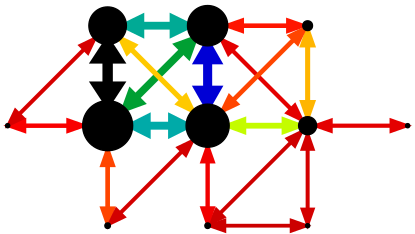

In [2]:
import ManageFile as mf
import GraphNetwork as gn
from IPython.display import Image

propname = ['occupancy', 'bins', 'transitions']
outname = [mf.set_output_name('PUMA', p, dt=20, tp=0.35, path=path, nhubs=4) for p in propname]
sysRgL.prop_to_file(propname, outname)
[occ_file, bins_file, trans_file] = outname
nwRgL = gn.graph(occ_file, trans_file, shift_color=0.8,
                 splines=True, ffac=0.05, facbothdir=0.8)
graphname = mf.set_output_name('PUMA', 'graph', dt=20, tp=0.35, fmt='eps', path=path, 
                               finfo=True, ffac=0.05, facbothdir=0.8, nhubs=4)
nwRgL.draw_graph(graphname)
graphname = mf.set_output_name('PUMA', 'graph', dt=20, tp=0.35, fmt='png', path=path, 
                               finfo=True, ffac=0.05, facbothdir=0.8, nhubs=4)
nwRgL.draw_graph(graphname, fmt='png')
Image(graphname)

The network has four hubs (most occupied bins). Now we put axes and identify the hubs from 1 to 4, where 1 is the most occupied hub:

![](PUMA_network.png)

 ## Energy distribution of the hubs in the network
 
 The hubs have the corresponding energy distributions (median energies indicated by dotted lines):

Median energy value for hub 1:-61.4025
Minimum energy value for hub 1:-92.241
Median energy value for hub 2:-58.095
Minimum energy value for hub 2:-88.8615
Median energy value for hub 3:-58.506
Minimum energy value for hub 3:-87.27
Median energy value for hub 4:-61.3185
Minimum energy value for hub 4:-91.752


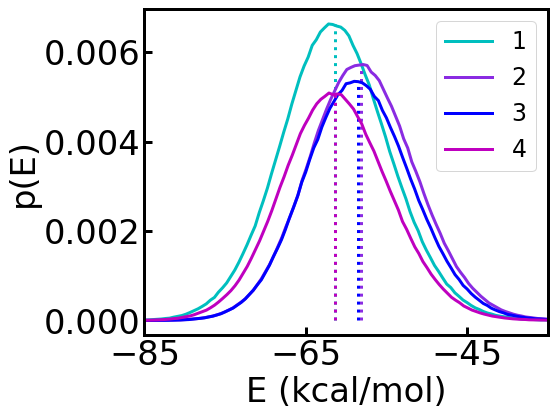

In [3]:
def distribution(x, weights, bsize):
    xlen = max(x)-min(x)
    nbins = int(xlen/bsize)
    edges = np.linspace(min(x),max(x),nbins)
    H, edges = np.histogram(x, bins=edges, weights=weights)
    
    centers = np.array(edges) + bsize*0.5
    centers = centers[0:-1]
    listH = list(H.T)
    medx = np.median(x)
    
    return centers, listH, medx

medE = []
Emax = []

fig, sbpl, fntsize = setfig.init(1, 1, hsize=6, wsize=8, left=0.2, d=2.25)

for i in range(sysRgL.nhubs): 
    color = colors[i]               
    
    E = [1.5*f for (a,b,c,d,e,f) in sysRgL.Elist[i]] #1.5 factor for units in kcal/mol
    weights = np.ones_like(E)/(sysRgL.lim*sysRgL.ntraj/sysRgL.dt)
    centers, listH, medE = distribution(E, weights, bsize=0.5)
    minE = min(E)
    
    maxH = max(listH)
    vline = np.arange(0, maxH+0.5*maxH/5, maxH/5)
    xline = [medE]*len(vline)    
    sbpl.plot(centers, listH, linewidth=3, label=str(i+1), color=color)
    sbpl.plot(xline, vline, ':', linewidth=3, color=color)
    sbpl.legend(fontsize=0.7*fntsize)
    setfig.custom_subplot(sbpl, fontsize=fntsize, linewidth=3, ticklength=8,
                          xmin=-85, xmax=-35, xstep_tick=20,
                          xlabel=r'E (kcal/mol)', ylabel=r'p(E)',
                         )
    print('Median energy value for hub '+str(i+1)+':'+str(medE))
    print('Minimum energy value for hub '+str(i+1)+':'+str(minE))

figname=path+'Energy_hub.eps'
fig.savefig(figname, dpi=600, fmt='eps')

## Lowest energy conformation of each hub

The conformations (snapshots) are recorded every 1000 $\tau$ of the simulation run. The lowest energy conformation (LEC) recorded for each hub is indicated below. The conformations are labeled according to the corresponding hub label.

LEC of hub 1 (traj, timestep, Rg, L, hub, contacts (i,i+l, l>=3), energy):
(201, 452000, 9.34, 15.32, (3, 2), 74.0, -88.80000000000001)
LEC of hub 2 (traj, timestep, Rg, L, hub, contacts (i,i+l, l>=3), energy):
(204, 782000, 10.32, 22.65, (4, 2), 68.0, -82.2615)
LEC of hub 3 (traj, timestep, Rg, L, hub, contacts (i,i+l, l>=3), energy):
(65, 290000, 10.13, 25.65, (4, 3), 73.0, -82.881)
LEC of hub 4 (traj, timestep, Rg, L, hub, contacts (i,i+l, l>=3), energy):
(201, 423000, 9.6, 23.54, (3, 3), 74.0, -85.23599999999999)


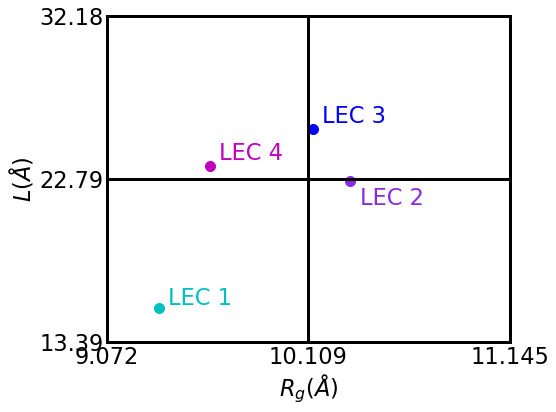

In [52]:
import numpy as np
import set_figure3 as setfig

dtprint=1000 #1000 step of recording conformations

fig, sbpl, fntsize = setfig.init(1, 1, hsize=6, wsize=8, left=0.2, d=1.5)
colors = ['c', 'blueviolet', 'b', 'm', 'r']

xmin = None
ymin = None
xmax = None
ymax = None

for i in range(sysRgL.nhubs): 
    color = colors[i]    
    
    minE = None
    for k, (a,b,c,d,e,f,g) in enumerate(sysRgL.ConfHubList[i]):
        if b%dtprint == 0:
            if minE == None or g < minE:
                minE = g
                idx = k
                Rg = c
                L = d 
    
    print('LEC of hub '+str(i+1)+' (traj, timestep, Rg, L, hub, contacts (i,i+l, l>=3), energy):')
    print(sysRgL.ConfHubList[i][idx])
    
    sbpl.plot(Rg,L, 'o', markersize=10, color=color)
    
    if i == 1:
        sbpl.text(Rg*1.005, L*0.94, "LEC "+str(i+1), fontsize=fntsize, color=color)
    else:
        sbpl.text(Rg*1.005, L*1.015, "LEC "+str(i+1), fontsize=fntsize, color=color)
    
    (e1,e2) = e
    if xmin == None or e1 < xmin:
        xmin = e1-1 #-1 fac for starting in 0
    if xmax == None or e1 > xmax:
        xmax = e1-1 #-1 fac for starting in 0
    if ymin == None or e2 < ymin:
        ymin = e2-1 #-1 fac for starting in 0
    if ymax == None or e2 > ymax:
        ymax = e2-1 #-1 fac for starting in 0

xbins = sysRgL.bins_x[xmin:xmax+2] #2 fac for adding another tick
ybins = sysRgL.bins_y[ymin:ymax+2] #2 fac for adding another tick

sbpl.plot(np.ones(2)*xbins[int(0.5*len(xbins))], np.linspace(ybins[0], ybins[-1], 2), 'k-', linewidth=3)
sbpl.plot(np.linspace(xbins[0], xbins[-1], 2), np.ones(2)*ybins[int(0.5*len(xbins))], 'k-', linewidth=3)
setfig.custom_subplot(sbpl, fontsize=fntsize, linewidth=3, ticklength=8,
                      xmin=xbins[0], xmax=xbins[-1]*1.0001, xstep_tick=sysRgL.len_xbin,
                      ymin=ybins[0], ymax=ybins[-1]*1.0001, ystep_tick=sysRgL.len_ybin,
                      xlabel=r'$R_g (\AA)$', ylabel=r'$L(\AA)$')

The corresponding conformations are shown below, where the first (last) residue is shown in red (green). The contacts shown in the conformations obbey the criteria i,i+l, where either l=[3,4] (left) or l>=5 (right).

LEC 1, l=[3,4] | LEC 1, l>=5
:-------------------------:|:-------------------------:
![alt text](hub1_e-88p8_traj201_ts452_i,i+3,4.gif)  |  ![alt text](hub1_e-88p8_traj201_ts452_i,i+l>=5.gif)

LEC 2, l=[3,4] | LEC 2, l>=5
:-------------------------:|:-------------------------:
![alt text](hub2_e-82p3_traj204_ts782_i,i+3,4.gif)  |  ![alt text](hub2_e-82p3_traj204_ts782_i,i+l>=5.gif)

LEC 3, l=[3,4] | LEC 3, l>=5
:-------------------------:|:-------------------------:
![alt text](hub3_e-82p9_traj65_ts290_i,i+3,4.gif)   |  ![alt text](hub3_e-82p9_traj65_ts290_i,i+l>=5.gif)

LEC 4, l=[3,4] | LEC 4, l>=5
:-------------------------:|:-------------------------:
![alt text](hub4_e-85p2_traj201_ts423_i,i+3,4.gif)  |  ![alt text](hub4_e-85p2_traj201_ts423_i,i+l>=5.gif)

The number of contacts for each case and criteria are below, together with the corresponding energy for each conformation.

| LEC | Energy (kcal/mol) | l=[3,4] | l>=5
| --- | --- | --- | --- |
| 1 | -88.8 | 29 | 29 |
| 2 | -82.3 | 33 | 29 |
| 3 | -82.9 | 34 | 28 |
| 4 | -85.2 | 38 | 27 |